# Ex6: To implement a Machine Learning Classification model using a Decision Tree Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [45]:
# Load the dataset
data = pd.read_csv(r"C:\Users\Hp\Desktop\Diabeties.csv")

In [46]:
# Split the dataset into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']


# Preprocessing: Replace missing values with NaN

In [47]:

X.replace(0, np.nan, inplace=True)

In [48]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [49]:
data.shape

(768, 9)

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Decision Tree Classifier

In [55]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()



In [56]:
# Define parameters for k-fold cross-validation
n_splits = 5  # Number of folds for cross-validation
skf = StratifiedKFold(n_splits=n_splits)

# Perform k-fold cross-validation
k_fold_scores = cross_val_score(dt_classifier, X, y, cv=skf)

# Calculate and print mean and standard deviation of cross-validation scores
mean_score = k_fold_scores.mean()
std_dev = k_fold_scores.std()


In [57]:

print("Mean Cross-Validation Score:", mean_score)
print("Standard Deviation of Cross-Validation Scores:", std_dev)

Mean Cross-Validation Score: 0.7213988625753333
Standard Deviation of Cross-Validation Scores: 0.046699973785315825


In [58]:
# Hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



In [59]:
# Grid search using k-fold cross-validation
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)



Best parameters found: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [29]:
# Fit the model with best parameters
best_dt_classifier = grid_search.best_estimator_
best_dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5)

# Confusion matrix

In [60]:
# Confusion matrix
y_pred = best_dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)



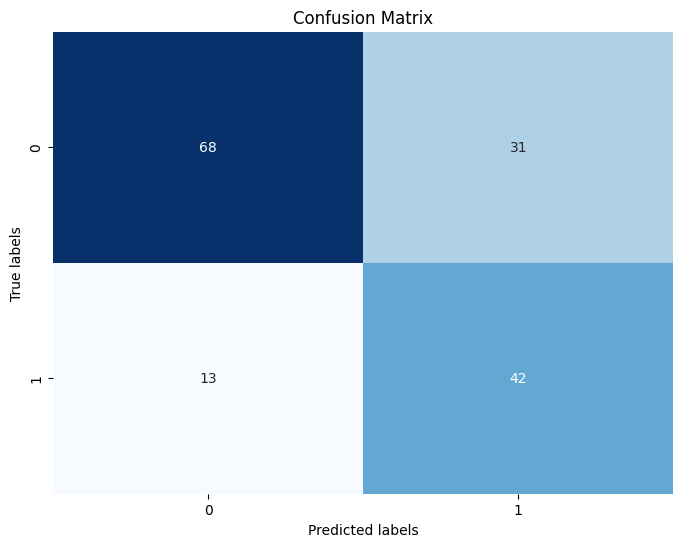

In [61]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()



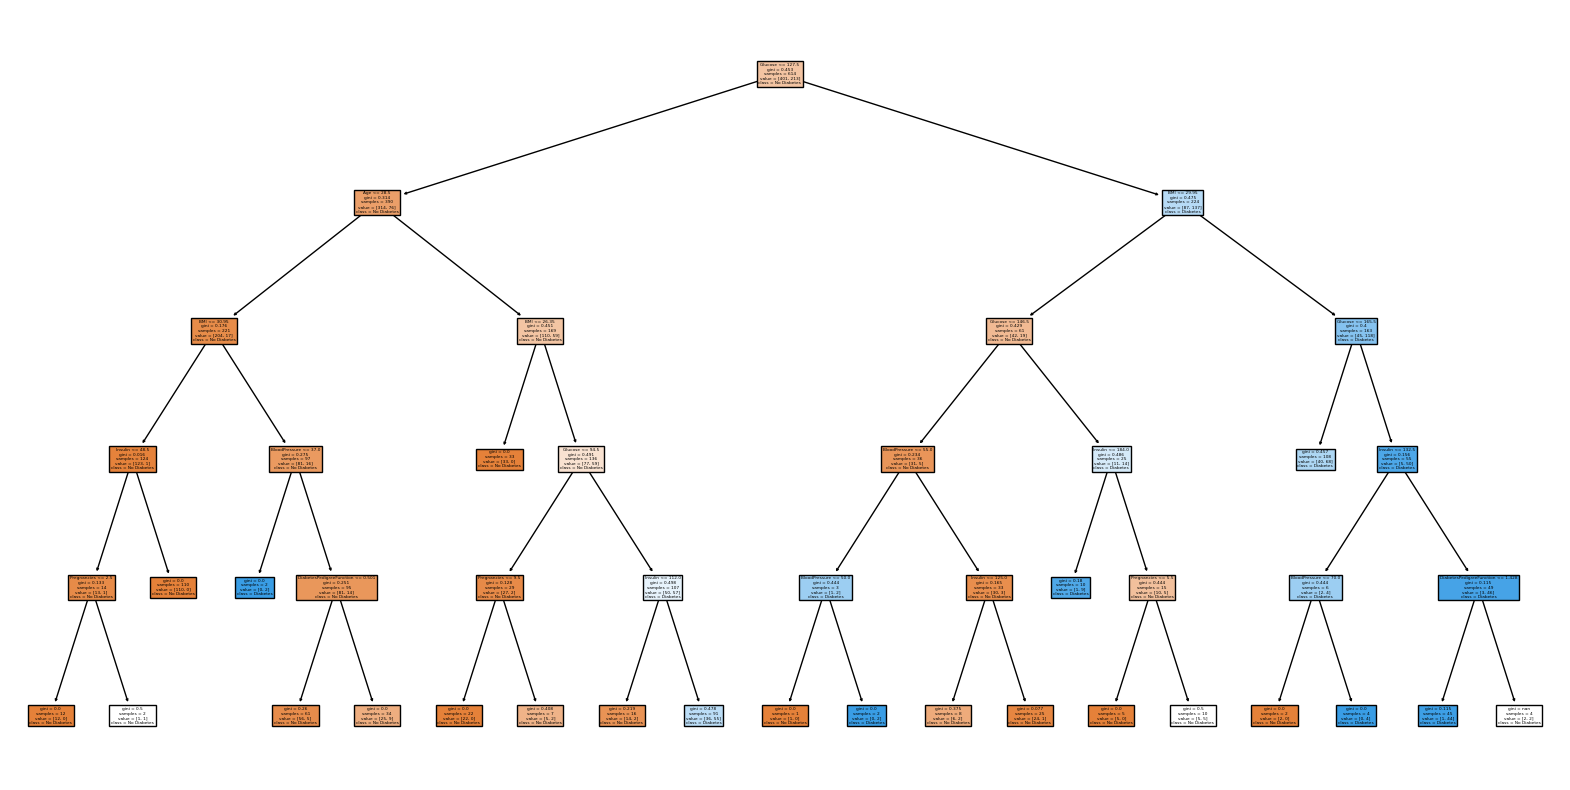

In [62]:
# Visualize decision tree
plt.figure(figsize=(20,10))
plot_tree(best_dt_classifier, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()

In [63]:
# Compute precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.5753424657534246
Recall: 0.7636363636363637
F1 Score: 0.65625
